In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_blobs
sns.set_theme(style="whitegrid")

#### Hinge loss:

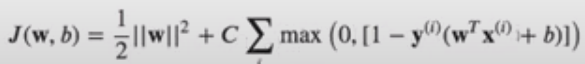

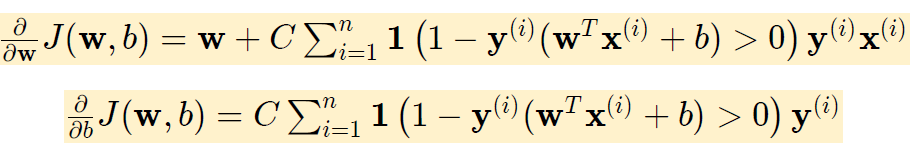

In [2]:
class softSVM:
    def __init__(self, C):
        self.support_vectors = None
        self.C = C
        self.b = None
    def __decision_function(self, X):
        return X.dot(self.w) + self.b
    def __loss(self, margin):
        return 0.5 * self.w.dot(self.w) + self.C * np.sum(np.maximum(0, 1 - margin))
    def __margin(self, X, y):
        return y * self.__decision_function(X)
    def fit(self, X, y, lr=1e-3, epochs=500):
        n, d = X.shape
        self.w = np.random.randn(d)
        self.b = 0
        
        losses = []
        for _ in range(epochs):
            margin = self.__margin(X, y)
            loss = self.__loss(margin)
            losses.append(loss)
            
            misclassified_pts_idx = np.where(margin < 1)[0]
            d_w = self.w - self.C * y[misclassified_pts_idx].dot(X[misclassified_pts_idx])
            self.w = self.w - lr * d_w
            
            d_b = - self.C * np.sum(y[misclassified_pts_idx])
            self.b = self.b - lr * d_b
            
        self._support_vectors = np.where(margin <= 1)[0]
    def predict(self, X):
        return np.sign(self.__decision_function(X))
    def score(self, X, y):
        p = self.predict(X)
        return np.mean(y == P)

In [3]:
X, Y = make_blobs(n_samples=60, n_features=2, centers=[[0,0],[6,6]], cluster_std=1, random_state=12)
Y = np.where(Y == 0, -1, 1)

In [4]:
print(X.shape, Y.shape)

(60, 2) (60,)


In [5]:
svm = softSVM(C=1)
svm.fit(X, Y)
print(svm.w, svm.b)

[0.3192936  0.24054622] -1.5079999999999927


In [6]:
newExample = np.array([-2.2,2.2])
svm.predict(newExample)

-1.0

Adding noise to the input data...

In [7]:
X, Y = make_blobs(n_samples=60, n_features=2, centers=2, cluster_std=1.1, random_state=0)
Y = np.where(Y == 0, -1, 1)

In [8]:
Y

array([ 1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,
       -1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1,
       -1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,
       -1,  1, -1, -1,  1,  1, -1,  1,  1])

In [9]:
svm = softSVM(C=100)  #As the value of C increases, them margin gets smaller.  Value of b increases
svm.fit(X, Y)
print(svm.w, svm.b)

[ 2.15466586 -3.93822931] 12.10000000000002


In [10]:
newExample = np.array([-2.2,2.2])
svm.predict(newExample)

-1.0

However, softSVM will not work well if you've non-linear decision boundaries.  In such cases, use KernelSVM